In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data=pd.DataFrame(pd.read_csv('data4.csv'))
df=data.copy()

In [3]:
df

,Unnamed: 0,title,road-width,floors,bedroom,parking,dientich,KT,huong,dia_chi,Price
0,1,"NHÀ RỘNG (110M2) 5X22M GIÁ TỐT 6,2 TỶ GẦN KĐT ...",7m,3 lầu,4 phòng ngủ,chỗ để xe,Diện tích: 110 m2,KT: 5x22m,Hướng: _,"Quốc Lộ 13, Phường Hiệp Bình Phước, Thành phố ...","Giá: 6,2 tỷ"
1,2,"BÁN NHÀ 1 TRỆT 3 LẦU NGAY ĐƯỜNG HOÀNG DIỆU 2, ...",7m,4 lầu,4 phòng ngủ,chỗ để xe,Diện tích: 57 m2,"KT: 4,5x13m",Hướng: _,"Đường Hoàng Diệu 2, Phường Linh Trung, Thành p...","Giá: 7,09 tỷ"
2,3,"Duy nhất 1 căn DT 67m2 (6.6x10.1) chỉ 4,5 tỷ -...",6m,3 lầu,4 phòng ngủ,chỗ để xe,Diện tích: 67 m2,"KT: 6,6x10,1m",Hướng: _,"Đường Số 10, Phường Hiệp Bình Phước, Thành phố...","Giá: 4,5 tỷ"
3,4,MỞ BÁN BẤT ĐỘNG SẢN HÀNG HIỆU THE GLOBAL CITY ...,24m,5 lầu,6 phòng ngủ,NaN,Diện tích: 120 m2,KT: 6x20m,Hướng: _,"Đường Đỗ Xuân Hợp, Phường An Phú, Thành phố Th...",Giá: 8 tỷ
4,5,DUY NHẤT 1 CĂN HIỆP BÌNH CHÁNH THỦ ĐỨC DT 5X16...,5m,3 lầu,4 phòng ngủ,chỗ để xe,Diện tích: 80 m2,KT: 5x16m,Hướng: _,"Đường Số 10, Phường Hiệp Bình Chánh, Thành phố...","Giá: 7,2 tỷ"
...,...,...,...,...,...,...,...,...,...,...,...
8175,8992,BDS HVL Nhà 5x20 xây 3 tầng đẹp - cạnh Chợ 261...,6m,2 lầu,3 phòng ngủ,NaN,Diện tích: 100 m2,KT: 5x20m,Hướng: _,"Đường Bưng Ông Thoàn, Phường Tăng Nhơn Phú B, ...","Giá: 6,8 tỷ"
8176,8993,BDS HVL Nhà 1 trệt 1 lầu 80m2 đường Đỗ Xuân Hợ...,5m,1 lầu,4 phòng ngủ,NaN,Diện tích: 80 m2,KT: 4x20m,Hướng: _,"Đường Đỗ Xuân Hợp, Phường Phước Long B, Thành ...","Giá: 6,3 tỷ"
8177,8994,bán nhà 737m2 mặt tiền võ văn ngân bình thọ vị...,12m,NaN,17 phòng ngủ,NaN,Diện tích: 737 m2,KT: ---,Hướng: _,"Đường Võ Văn Ngân, Phường Bình Thọ, Thành phố ...",Giá: 300 triệu / m2
8178,8995,bán mặt tiền 21x50 hoàng diệu 2 thủ đức,8m,NaN,2 phòng ngủ,NaN,Diện tích: 1.017 m2,KT: 21x50m,Hướng: Tây Nam,"Đường Hoàng Diệu 2, , Thành phố Thủ Đức, Hồ Ch...",Giá: 250 triệu / m2


In [4]:
#label các giá trị cột parking
df.parking.replace({"chỗ để xe":"1"},inplace=True)
df.parking.fillna("0", inplace= True)
#drop các cột ko cần thiết
df.drop(columns=['Unnamed: 0', 'title', 'huong'],inplace=True)
#drop những quan sát có nhiều hơn 2 cột NA
df.dropna(how='all',subset=['road-width','floors','bedroom'],inplace=True)
#drop duplicate
df.drop_duplicates(inplace = True)

In [5]:
df

,road-width,floors,bedroom,parking,dientich,KT,dia_chi,Price
0,7m,3 lầu,4 phòng ngủ,1,Diện tích: 110 m2,KT: 5x22m,"Quốc Lộ 13, Phường Hiệp Bình Phước, Thành phố ...","Giá: 6,2 tỷ"
1,7m,4 lầu,4 phòng ngủ,1,Diện tích: 57 m2,"KT: 4,5x13m","Đường Hoàng Diệu 2, Phường Linh Trung, Thành p...","Giá: 7,09 tỷ"
2,6m,3 lầu,4 phòng ngủ,1,Diện tích: 67 m2,"KT: 6,6x10,1m","Đường Số 10, Phường Hiệp Bình Phước, Thành phố...","Giá: 4,5 tỷ"
3,24m,5 lầu,6 phòng ngủ,0,Diện tích: 120 m2,KT: 6x20m,"Đường Đỗ Xuân Hợp, Phường An Phú, Thành phố Th...",Giá: 8 tỷ
4,5m,3 lầu,4 phòng ngủ,1,Diện tích: 80 m2,KT: 5x16m,"Đường Số 10, Phường Hiệp Bình Chánh, Thành phố...","Giá: 7,2 tỷ"
...,...,...,...,...,...,...,...,...
8173,12m,NaN,5 phòng ngủ,0,Diện tích: 343 m2,KT: 6x50m,"Đường Song Hành, Phường Phước Long A, Thành ph...",Giá: 25 tỷ
8174,8m,6 lầu,2 phòng ngủ,0,Diện tích: 859 m2,KT: 13x65m,"Đường Đặng Văn Bi, Phường Trường Thọ, Thành ph...",Giá: 99 tỷ
8177,12m,NaN,17 phòng ngủ,0,Diện tích: 737 m2,KT: ---,"Đường Võ Văn Ngân, Phường Bình Thọ, Thành phố ...",Giá: 300 triệu / m2
8178,8m,NaN,2 phòng ngủ,0,Diện tích: 1.017 m2,KT: 21x50m,"Đường Hoàng Diệu 2, , Thành phố Thủ Đức, Hồ Ch...",Giá: 250 triệu / m2


In [6]:
#thay toàn bộ NAN thành "0m" để tiện cho những xử lý sau này
df.fillna("0m",inplace= True)

In [7]:
#Nhà có diện tích ko xác định
dtkxd=df.loc[df['dientich']=='Diện tích: KXĐ']
dtkxd

,road-width,floors,bedroom,parking,dientich,KT,dia_chi,Price
67,20m,1 lầu,3 phòng ngủ,0,Diện tích: KXĐ,KT: 5x20m,"Đường Nguyễn Duy Trinh, Phường Bình Trưng Đông...",Giá: 12 tỷ
550,0m,3 lầu,4 phòng ngủ,0,Diện tích: KXĐ,KT: 0x0m,"Đường Lê Văn Thịnh, , Thành phố Thủ Đức, Hồ Ch...",Giá: 12 tỷ
551,12m,2 lầu,4 phòng ngủ,0,Diện tích: KXĐ,KT: 5x20m,"Đường Lương Định Của, Phường An Phú, Thành phố...",Giá: 15 tỷ
552,0m,0m,0m,0,Diện tích: KXĐ,KT: 0x0m,"Đường Dương Đình Hội, Phường Phước Long B, Thà...","Giá: 11,5 tỷ"
553,0m,0m,0m,0,Diện tích: KXĐ,KT: 0x0m,"Đường Dương Đình Hội, Phường Phước Long B, Thà...","Giá: 9,98 tỷ"
7910,1m,2 lầu,2 phòng ngủ,1,Diện tích: KXĐ,KT: 0x0m,"Đường Số 49, Phường Hiệp Bình Chánh, Thành phố...","Giá: 2,98 tỷ"
8140,1m,2 lầu,2 phòng ngủ,1,Diện tích: KXĐ,KT: 0x0m,"Đường Số 4, Phường Linh Tây, Thành phố Thủ Đức...","Giá: 2,47 tỷ"


In [8]:
#Tính giá trị diện tích KXĐ của những nhà có giá trị KT
df['dientich'].loc[df['KT']=='KT: 5x20m']= "Diện tích: 100 m2"

In [9]:
#drop Nhà có diện tích ko xác 
df.drop(df.loc[df['dientich']=='Diện tích: KXĐ'].index,inplace=True)

In [10]:
#Nhà có giá thỏa thuận
thoathuan=df.loc[df['Price']=='Giá: Thỏa thuận']
thoathuan

,road-width,floors,bedroom,parking,dientich,KT,dia_chi,Price
885,6m,5 lầu,12 phòng ngủ,1,Diện tích: 126 m2,KT: 5x25m,"Đường Số 1, Phường An Phú, Thành phố Thủ Đức, ...",Giá: Thỏa thuận
7887,25m,1 lầu,1 phòng ngủ,0,Diện tích: 3.200 m2,KT: 32x40m,"Đường Xa Lộ Hà Nội, Phường An Phú, Thành phố T...",Giá: Thỏa thuận


In [11]:
#drop nhà có giá thỏa thuận
df.drop(thoathuan.index,inplace=True)

In [12]:
# loại bỏ kí tự chữ trong quan sát 
def remove_alphabet(x):
    x.astype('str')
    a=list(x)
    b=[]
    for i in a:
        i=i.replace(',','.')
        for k in i:
            if not k.isnumeric() and not k=='.' and not k=='x':
                i=i.replace(k,'')
        b.append(i)
    return b

In [13]:
rw=remove_alphabet(df['road-width'])
df['road-width']=rw
#Cột road-width tồn tài giá trị '' (rỗng), thay thế các giá trị này bằng '0'
for i in range(len(df['road-width'])):
    if df['road-width'].iloc[i]=='' :
        df['road-width'].iloc[i]='0'

In [14]:
fl=remove_alphabet(df['floors'])
df['floors']=fl

In [15]:
br=remove_alphabet(df['bedroom'])
df['bedroom']=br

In [16]:
dt=[]
for i in df['dientich']:
    i= i.replace('Diện tích: ','')
    i= i.replace(' m2','')
    i=i.replace('.','')
    dt.append(i)
df['dientich']=dt

In [17]:
kt=remove_alphabet(df['KT'])
df['KT']=kt

In [18]:
#Cột KT tồn tài giá trị '' (rỗng), thay thế các giá trị này bằng '0x0'
for i in range(len(df['KT'])):
    if df['KT'].iloc[i]=='' :
        df['KT'].iloc[i]='0x0'

In [19]:
#Bây giờ giá trị cột KT đã theo format 'rộng'x'dài'
#tạo thêm 2 cột chiều rộng, chiều dài bằng cách tạo 2 list rỗng, chứa 2 giá trị sẽ có khi ta split('x') theo từng giá trị trong cột 'KT'
# Tuy nhiên phát hiện có 1 giá trị có format ko như ý ('5x57x9.80') , khi đang chạy vòng lặp
'''for i in range(len(df['KT'])) :
    r,d= df['KT'].iloc[i].split('x')
    rong.append(r)
    dai.append(d)
    print('process: ',i) --> dòng này giúp phát hiện vị trí có giá trị lỗi'''
#Giải quyết: sứa thành '5.57x9.80'
df['KT'][7866]='5.57x9.80'

In [20]:
rong=[]
dai=[]
for i in range(len(df['KT'])) :
    r,d= df['KT'].iloc[i].split('x')
    rong.append(r)
    dai.append(d)
df['chieurong']=rong
df['chieudai']=dai

In [21]:
#kiểm tra các giá trị lỗi ở cột chieurong, chieudai không thể đổi sang float
d = pd.DataFrame(columns=df.columns)
for i in df['chieurong']:
    try:
        float(i)
    except:
        d = d.append(df[df['chieurong'] == i])

for j in df['chieudai']:
    try:
        float(j)
    except:
        d = d.append(df[df['chieudai'] == j])

d

,road-width,floors,bedroom,parking,dientich,KT,dia_chi,Price,chieurong,chieudai
3223,10,1,3,0,200,5.8.8x30,"Đường Tân Lập, Phường Hiệp Phú, Thành phố Thủ ...","Giá: 18,5 tỷ",5.8.8,30
3288,20,5,10,0,157,4.86.5x30,"Đường Võ Văn Ngân, Phường Bình Thọ, Thành phố ...",Giá: 52 tỷ,4.86.5,30
3941,4,3,4,0,65,4.24.5x14.5,"Đường D16, Phường Linh Chiểu, Thành phố Thủ Đứ...","Giá: 8,15 tỷ",4.24.5,14.5
4215,8,2,8,0,249,4.317.5x20,"Đường Kha Vạn Cân, Phường Linh Tây, Thành phố ...","Giá: 15,5 tỷ",4.317.5,20
4805,10,2,3,0,140,.4.5x31,"Đường Đình Phong Phú, Phường Tăng Nhơn Phú A, ...","Giá: 9,6 tỷ",.4.5,31
7815,5,2,2,1,86,4.6x18.7.,"Đường số 26, Phường Hiệp Bình Chánh, Thành phố...","Giá: 6,5 tỷ",4.6,18.7.


In [22]:
#Sửa các giá trị lỗi
df['chieurong'].loc[df['chieurong']=='5.8.8']='6.5'
df['chieurong'].loc[df['chieurong']=='4.86.5']='5'
df['chieurong'].loc[df['chieurong']=='4.24.5']='4.5'
df['chieurong'].loc[df['chieurong']=='4.317.5']='6.5'
df['chieurong'].loc[df['chieurong']=='.4.5']='4.5'
df['chieudai'].loc[df['chieudai']=='18.7.']='18.7'

In [23]:
#remove alphabet characters of columns Price
df['Price_copy']=df['Price'].copy()
price1=[]
for i in df['Price']:
    i= i.replace('/\xa0m2\xa0\xa0','')
    price1.append(i)
df['Price']=price1
price2=remove_alphabet(df['Price'])
df['Price']=price2

In [24]:
#Đổi các giá trị cột 'road-width','floors','bedroom','dientich','chieurong','chieudai','Price' sang dạng float
numeric_features=['road-width','floors','bedroom','dientich','chieurong','chieudai','Price']
df[numeric_features]=df[numeric_features].astype('float',copy=False)

In [25]:
#trường hợp dữ liệu những nhà thiếu chiều dài, chiều rộng, ta đặt giả thiết chiều dài = chiều rộng và thay giá trị 0 bằng giá trị căn diện tích
a = df.loc[(df['chieurong'] == 0) | (df['chieudai'] == 0)]
a['chieurong'] = a['chieudai'] =  np.sqrt(a['dientich'])

c:\users\tan phuoc\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [26]:
df.drop(a.index, inplace=True)

In [27]:
df=df.append(a)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7754 entries, 0 to 8179
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   road-width  7754 non-null   float64
 1   floors      7754 non-null   float64
 2   bedroom     7754 non-null   float64
 3   parking     7754 non-null   object 
 4   dientich    7754 non-null   float64
 5   KT          7754 non-null   object 
 6   dia_chi     7754 non-null   object 
 7   Price       7754 non-null   float64
 8   chieurong   7754 non-null   float64
 9   chieudai    7754 non-null   float64
 10  Price_copy  7754 non-null   object 
dtypes: float64(7), object(4)
memory usage: 605.8+ KB


In [29]:
#Dữ liệu giá có những nhà ko tính giá tổng mà tính theo m2 -> tính ra giá tổng
for i in range(len(df['Price'])):
    if '/\xa0m2\xa0\xa0' in df['Price_copy'].iloc[i]:
        df['Price'].iloc[i] = df['Price'].iloc[i] * df['dientich'].iloc[i]

c:\users\tan phuoc\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [30]:
#Dữ liệu giá có 2 đơn vị (triệu và tỷ) --> chuyển hết thành tỷ
for i in range(len(df['Price'])):
    if 'triệu' in df['Price_copy'].iloc[i]:
        df['Price'].iloc[i] = df['Price'].iloc[i] /1000

In [31]:
df

,road-width,floors,bedroom,parking,dientich,KT,dia_chi,Price,chieurong,chieudai,Price_copy
0,7.0,3.0,4.0,1,110.0,5x22,"Quốc Lộ 13, Phường Hiệp Bình Phước, Thành phố ...",6.20,5.000000,22.000000,"Giá: 6,2 tỷ"
1,7.0,4.0,4.0,1,57.0,4.5x13,"Đường Hoàng Diệu 2, Phường Linh Trung, Thành p...",7.09,4.500000,13.000000,"Giá: 7,09 tỷ"
2,6.0,3.0,4.0,1,67.0,6.6x10.1,"Đường Số 10, Phường Hiệp Bình Phước, Thành phố...",4.50,6.600000,10.100000,"Giá: 4,5 tỷ"
3,24.0,5.0,6.0,0,120.0,6x20,"Đường Đỗ Xuân Hợp, Phường An Phú, Thành phố Th...",8.00,6.000000,20.000000,Giá: 8 tỷ
4,5.0,3.0,4.0,1,80.0,5x16,"Đường Số 10, Phường Hiệp Bình Chánh, Thành phố...",7.20,5.000000,16.000000,"Giá: 7,2 tỷ"
...,...,...,...,...,...,...,...,...,...,...,...
8162,1.0,2.0,2.0,1,68.0,0x0,"Đường Số 49, Phường Hiệp Bình Chánh, Thành phố...",4.20,8.246211,8.246211,"Giá: 4,2 tỷ"
8168,4.0,0.0,2.0,0,75.0,0x0,"Đường Số 4, Phường Hiệp Bình Phước, Thành phố ...",4.60,8.660254,8.660254,"Giá: 4,6 tỷ"
8172,4.0,0.0,2.0,0,49.0,0x0,"Đường Số 20, Phường Linh Đông, Thành phố Thủ Đ...",3.60,7.000000,7.000000,"Giá: 3,6 tỷ"
8177,12.0,0.0,17.0,0,737.0,0x0,"Đường Võ Văn Ngân, Phường Bình Thọ, Thành phố ...",221.10,27.147744,27.147744,Giá: 300 triệu / m2


In [32]:
#Drop các cột không cần thiết nữa
essential_df=df.drop(columns=['KT','Price_copy'])
essential_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7754 entries, 0 to 8179
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   road-width  7754 non-null   float64
 1   floors      7754 non-null   float64
 2   bedroom     7754 non-null   float64
 3   parking     7754 non-null   object 
 4   dientich    7754 non-null   float64
 5   dia_chi     7754 non-null   object 
 6   Price       7754 non-null   float64
 7   chieurong   7754 non-null   float64
 8   chieudai    7754 non-null   float64
dtypes: float64(7), object(2)
memory usage: 545.2+ KB


In [33]:
essential_df

,road-width,floors,bedroom,parking,dientich,dia_chi,Price,chieurong,chieudai
0,7.0,3.0,4.0,1,110.0,"Quốc Lộ 13, Phường Hiệp Bình Phước, Thành phố ...",6.20,5.000000,22.000000
1,7.0,4.0,4.0,1,57.0,"Đường Hoàng Diệu 2, Phường Linh Trung, Thành p...",7.09,4.500000,13.000000
2,6.0,3.0,4.0,1,67.0,"Đường Số 10, Phường Hiệp Bình Phước, Thành phố...",4.50,6.600000,10.100000
3,24.0,5.0,6.0,0,120.0,"Đường Đỗ Xuân Hợp, Phường An Phú, Thành phố Th...",8.00,6.000000,20.000000
4,5.0,3.0,4.0,1,80.0,"Đường Số 10, Phường Hiệp Bình Chánh, Thành phố...",7.20,5.000000,16.000000
...,...,...,...,...,...,...,...,...,...
8162,1.0,2.0,2.0,1,68.0,"Đường Số 49, Phường Hiệp Bình Chánh, Thành phố...",4.20,8.246211,8.246211
8168,4.0,0.0,2.0,0,75.0,"Đường Số 4, Phường Hiệp Bình Phước, Thành phố ...",4.60,8.660254,8.660254
8172,4.0,0.0,2.0,0,49.0,"Đường Số 20, Phường Linh Đông, Thành phố Thủ Đ...",3.60,7.000000,7.000000
8177,12.0,0.0,17.0,0,737.0,"Đường Võ Văn Ngân, Phường Bình Thọ, Thành phố ...",221.10,27.147744,27.147744


In [34]:
#Tạo cột đường và phường
Road = []
District = []
for i in essential_df["dia_chi"]:
    i = i.split(", ")
    Road.append(i[0])
    District.append(i[1])

essential_df["Road"] = Road
essential_df["District"] = District
#drop nhà ko có thông tin phường District
essential_df = essential_df.drop(essential_df[essential_df['District']==""].index)
essential_df

,road-width,floors,bedroom,parking,dientich,dia_chi,Price,chieurong,chieudai,Road,District
0,7.0,3.0,4.0,1,110.0,"Quốc Lộ 13, Phường Hiệp Bình Phước, Thành phố ...",6.20,5.000000,22.000000,Quốc Lộ 13,Phường Hiệp Bình Phước
1,7.0,4.0,4.0,1,57.0,"Đường Hoàng Diệu 2, Phường Linh Trung, Thành p...",7.09,4.500000,13.000000,Đường Hoàng Diệu 2,Phường Linh Trung
2,6.0,3.0,4.0,1,67.0,"Đường Số 10, Phường Hiệp Bình Phước, Thành phố...",4.50,6.600000,10.100000,Đường Số 10,Phường Hiệp Bình Phước
3,24.0,5.0,6.0,0,120.0,"Đường Đỗ Xuân Hợp, Phường An Phú, Thành phố Th...",8.00,6.000000,20.000000,Đường Đỗ Xuân Hợp,Phường An Phú
4,5.0,3.0,4.0,1,80.0,"Đường Số 10, Phường Hiệp Bình Chánh, Thành phố...",7.20,5.000000,16.000000,Đường Số 10,Phường Hiệp Bình Chánh
...,...,...,...,...,...,...,...,...,...,...,...
8162,1.0,2.0,2.0,1,68.0,"Đường Số 49, Phường Hiệp Bình Chánh, Thành phố...",4.20,8.246211,8.246211,Đường Số 49,Phường Hiệp Bình Chánh
8168,4.0,0.0,2.0,0,75.0,"Đường Số 4, Phường Hiệp Bình Phước, Thành phố ...",4.60,8.660254,8.660254,Đường Số 4,Phường Hiệp Bình Phước
8172,4.0,0.0,2.0,0,49.0,"Đường Số 20, Phường Linh Đông, Thành phố Thủ Đ...",3.60,7.000000,7.000000,Đường Số 20,Phường Linh Đông
8177,12.0,0.0,17.0,0,737.0,"Đường Võ Văn Ngân, Phường Bình Thọ, Thành phố ...",221.10,27.147744,27.147744,Đường Võ Văn Ngân,Phường Bình Thọ


In [35]:
# Thay thế những giá trị 0 ở 3 cột road-width, bedroom, floors với giá vị trung vị của 3 cột đó theo từng phường  
unique_List_District = list(essential_df['District'].unique())

for i in unique_List_District:
    med_rw=essential_df.loc[essential_df.District == i,'road-width'].median()
    med_br=essential_df.loc[essential_df.District == i,'bedroom'].median()
    med_fl=essential_df.loc[essential_df.District == i,'floors'].median()
    #Replace column floors with the median: 
    essential_df.loc[(essential_df.District == i) & (essential_df['floors']==0.0),'floors'] = med_fl
    #Replace column bedroom with the median: 
    essential_df.loc[(essential_df.District == i) & (essential_df['bedroom']==0.0),'bedroom'] = med_br
    #Replace column road-width with the median: 
    essential_df.loc[(essential_df.District == i) & (essential_df['road-width']==0.0),'road-width'] = med_rw

In [36]:
essential_df

,road-width,floors,bedroom,parking,dientich,dia_chi,Price,chieurong,chieudai,Road,District
0,7.0,3.0,4.0,1,110.0,"Quốc Lộ 13, Phường Hiệp Bình Phước, Thành phố ...",6.20,5.000000,22.000000,Quốc Lộ 13,Phường Hiệp Bình Phước
1,7.0,4.0,4.0,1,57.0,"Đường Hoàng Diệu 2, Phường Linh Trung, Thành p...",7.09,4.500000,13.000000,Đường Hoàng Diệu 2,Phường Linh Trung
2,6.0,3.0,4.0,1,67.0,"Đường Số 10, Phường Hiệp Bình Phước, Thành phố...",4.50,6.600000,10.100000,Đường Số 10,Phường Hiệp Bình Phước
3,24.0,5.0,6.0,0,120.0,"Đường Đỗ Xuân Hợp, Phường An Phú, Thành phố Th...",8.00,6.000000,20.000000,Đường Đỗ Xuân Hợp,Phường An Phú
4,5.0,3.0,4.0,1,80.0,"Đường Số 10, Phường Hiệp Bình Chánh, Thành phố...",7.20,5.000000,16.000000,Đường Số 10,Phường Hiệp Bình Chánh
...,...,...,...,...,...,...,...,...,...,...,...
8162,1.0,2.0,2.0,1,68.0,"Đường Số 49, Phường Hiệp Bình Chánh, Thành phố...",4.20,8.246211,8.246211,Đường Số 49,Phường Hiệp Bình Chánh
8168,4.0,3.0,2.0,0,75.0,"Đường Số 4, Phường Hiệp Bình Phước, Thành phố ...",4.60,8.660254,8.660254,Đường Số 4,Phường Hiệp Bình Phước
8172,4.0,2.0,2.0,0,49.0,"Đường Số 20, Phường Linh Đông, Thành phố Thủ Đ...",3.60,7.000000,7.000000,Đường Số 20,Phường Linh Đông
8177,12.0,2.0,17.0,0,737.0,"Đường Võ Văn Ngân, Phường Bình Thọ, Thành phố ...",221.10,27.147744,27.147744,Đường Võ Văn Ngân,Phường Bình Thọ


In [37]:
# figure = plt.figure(figsize=(15,8))
# # plotting correlation heatmap
# sns.heatmap(essential_df.corr(), cmap="hot", annot=True , linewidths=0.5 ,  linecolor= "White")
  
# # displaying heatmap
# plt.show()

In [38]:
# for i in unique_List_District:
#     x = essential_df[essential_df["District"] == str(i)]
#     x_corr = x[["bedroom","dientich","floors"]]
#     describe = x[["bedroom","dientich","floors"]].describe().T.style.background_gradient(cmap='RdPu')
#     print("Mô tả "+i )
#     display(describe)
#     print("\n")
    
#     fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15,15))
#     fig.subplots_adjust(left=0.2, wspace=0.6)
#     ax0, ax1, ax2 , ax3 = axes.flatten()
 
#     ### Subplot 0: bedroom Plot ###
#     ax0.hist(x["bedroom"], color = 'grey',
#              bins = 'auto', edgecolor='k' , linewidth=1.2)
#     ax0.set_title('Bedroom histogram')
#     ax0.set_xlabel('Bedroom')
#     ax0.set_ylabel('Number')
    
#     ### Subplot 1: dientich Plot ###
#     ax1.hist(x["dientich"], color = 'grey',
#              bins = 'auto', edgecolor='k' , linewidth=1.2)
#     ax1.set_title('dientich histogram')
#     ax1.set_xlabel('dientich')
#     ax1.set_ylabel('Number')

#     ### Subplot 2: floors Plot ###
#     ax2.hist(x["floors"], color = 'grey',
#              bins = 'auto', edgecolor="k" , linewidth=1.2)
#     ax2.set_title('floors histogram')
#     ax2.set_xlabel('floors')
#     ax2.set_ylabel('Number')
    
#     ### Subplot 3: floors Plot ###
# #     ax3.hist(x["Road"], color = 'grey',
# #              bins = 15, edgecolor="k" , linewidth=1.2, orientation = 'horizontal')
# #     ax3.set_title('Road histogram')
# #     ax3.set_xlabel('Road')
# #     ax3.set_ylabel('Number')
#     ax3 = sns.heatmap(x_corr.corr(), cmap="hot", annot=True , linewidths=0.5 ,  linecolor= "White")

#     plt.show()


In [39]:
essential_df[["Price","District"]].groupby(["District"]).describe()

Price                                                  \
                        count         mean           std       min        25%   
District                                                                        
Phường An Khánh          75.0    38.783867     93.196032    0.2200   13.90000   
Phường An Lợi Đông        1.0    47.000000           NaN   47.0000   47.00000   
Phường An Phú           657.0    29.772828     30.046017    0.1150   16.50000   
Phường Bình An          649.0    59.124512    422.511947    0.9600   13.50000   
Phường Bình Chiểu       165.0     7.412848     13.076005    0.9450    4.20000   
Phường Bình Khánh        20.0    92.867000    134.316669    1.1900   16.87500   
Phường Bình Thọ         211.0    33.971559     46.838228    1.1000    5.02000   
Phường Bình Trưng Tây    93.0    24.030645     20.777669    1.0100    8.60000   
Phường Bình Trưng Đông   57.0    18.130158     15.694630    2.1000    7.60000   
Phường Cát Lái           33.0    24.016970     39.097083    1.2700   10.00000   
Phường Hiệp Bình Chánh  827.0    12.970623     81.422973    0.7600    5.35000   
Phường Hiệp Bình Phước  534.0    12.367751     93.758551    0.9900    5.35000   
Phường Hiệp Phú         200.0    32.380870    171.188559    0.7500    6.80000   
Phường Linh Chiểu       221.0    12.219267     23.032789    0.9600    4.80000   
Phường Linh Trung       176.0    13.844392     18.977225    0.8500    5.93750   
Phường Linh Tây         171.0    10.468567     35.366429    1.2350    4.80000   
Phường Linh Xuân        304.0    10.213500     17.014911    1.0000    4.20000   
Phường Linh Đông        293.0    13.326416     29.603514    0.8800    4.26000   
Phường Long Bình         30.0    13.622400     15.330598    2.2000    4.06125   
Phường Long Phước        21.0     7.069286      9.614477    0.9000    3.90000   
Phường Long Thạnh Mỹ    107.0    24.646439     35.799383    0.8990    7.00000   
Phường Long Trường       98.0    10.360041     22.882802    1.5500    4.05500   
Phường Phú Hữu           83.0    19.121434     35.898307    1.1500    5.20000   
Phường Phước Bình        79.0    10.720380      7.303744    0.9600    8.20000   
Phường Phước Long         1.0     4.600000           NaN    4.6000    4.60000   
Phường Phước Long A     115.0    13.455435     17.374288    0.2000    5.07000   
Phường Phước Long B     540.0    25.341074     22.865729    0.1982    6.33750   
Phường Tam Bình         117.0     7.323590      6.171497    1.3200    4.50000   
Phường Tam Phú           66.0     8.646258     13.329972    1.2500    3.36250   
Phường Thạnh Mỹ Lợi      89.0  1259.374337  11444.236300    1.2200    9.50000   
Phường Thảo Điền        775.0    66.182591     84.579352    0.9300   22.50000   
Phường Thủ Thiêm          2.0   240.000000      0.000000  240.0000  240.00000   
Phường Trường Thạnh      68.0     8.643779      7.656425    3.0700    4.49175   
Phường Trường Thọ       344.0    11.975718     20.701764    0.9470    4.50000   
Phường Tân Phú           81.0    19.353346     22.804636    1.4000    6.80000   
Phường Tăng Nhơn Phú A  266.0    12.572139     25.035320    0.9000    5.16250   
Phường Tăng Nhơn Phú B  165.0    13.748042     52.934975    1.1500    4.50000   

                                                         
                              50%       75%         max  
District                                                 
Phường An Khánh          18.70000   25.8000     765.000  
Phường An Lợi Đông       47.00000   47.0000      47.000  
Phường An Phú            21.50000   34.0000     510.000  
Phường Bình An           22.90000   35.0000   10500.000  
Phường Bình Chiểu         5.30000    5.9000     125.000  
Phường Bình Khánh        35.00000  126.2500     600.000  
Phường Bình Thọ          18.00000   44.0000     263.000  
Phường Bình Trưng Tây    15.00000   35.0000     130.000  
Phường Bình Trưng Đông   12.90000   23.5000      66.000  
Phường Cát Lái           13.80000   20.0000     220.000  
Phường Hiệp Bình Chánh    7.2

In [40]:
essential_df.drop(essential_df[essential_df['Price'] > 20].index, inplace=True)

In [41]:
essential_df.drop(['dia_chi','Road'], axis=1, inplace=True)

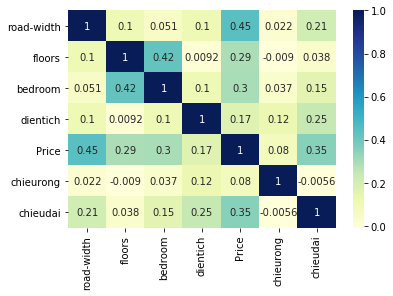

In [42]:
sns.heatmap(essential_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [43]:
# essential_df.drop(essential_df[essential_df['Price'] < 4].index, inplace=True)

In [44]:
essential_df.describe()

,road-width,floors,bedroom,dientich,Price,chieurong,chieudai
count,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000
mean,8.145798,2.357508,3.755298,98.879978,8.502475,6.155445,16.277998
std,6.647784,1.234393,2.947357,166.393172,4.763066,10.123799,8.298745
min,0.000000,1.000000,1.000000,4.000000,0.115000,0.600000,1.000000
25%,5.000000,1.000000,2.000000,60.000000,4.850000,4.000000,11.180340
50%,6.000000,2.000000,3.000000,80.000000,7.000000,5.000000,15.000000
75%,10.000000,3.000000,4.000000,110.000000,12.000000,7.000000,20.000000
max,233.000000,17.000000,44.000000,8160.000000,20.000000,511.000000,237.000000


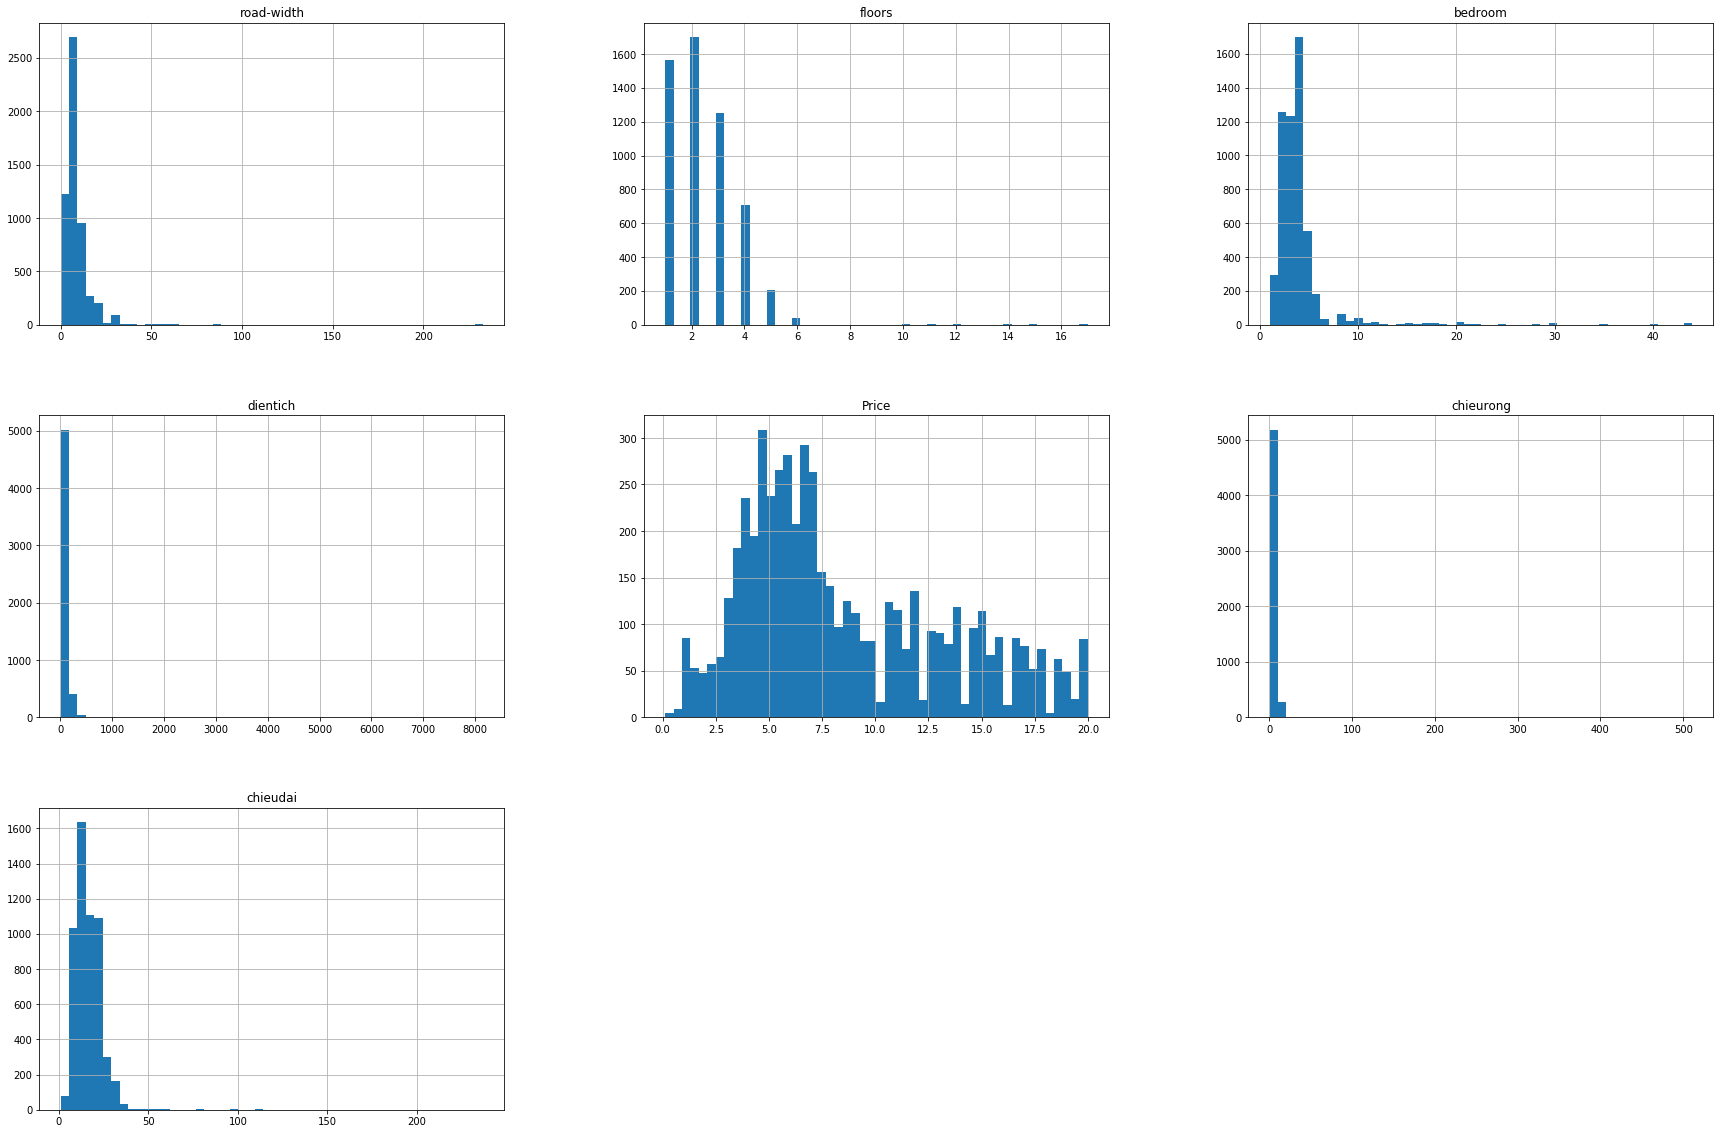

In [45]:
essential_df.hist(bins=50, figsize=(30,20))
plt.show()

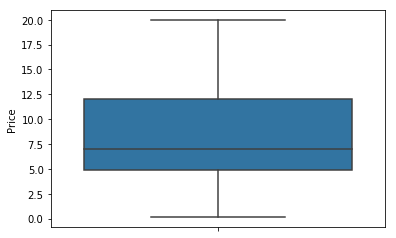

In [46]:
sns.boxplot(data=essential_df, y='Price')
plt.show()

In [47]:
dummies = pd.get_dummies(essential_df['District'])
df_final = pd.concat([essential_df, dummies], axis='columns')
df_final.drop('District', axis='columns', inplace=True)

In [48]:
df_final = df_final.astype(float)

In [49]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5474 entries, 0 to 8179
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   road-width              5474 non-null   float64
 1   floors                  5474 non-null   float64
 2   bedroom                 5474 non-null   float64
 3   parking                 5474 non-null   float64
 4   dientich                5474 non-null   float64
 5   Price                   5474 non-null   float64
 6   chieurong               5474 non-null   float64
 7   chieudai                5474 non-null   float64
 8   Phường An Khánh         5474 non-null   float64
 9   Phường An Phú           5474 non-null   float64
 10  Phường Bình An          5474 non-null   float64
 11  Phường Bình Chiểu       5474 non-null   float64
 12  Phường Bình Khánh       5474 non-null   float64
 13  Phường Bình Thọ         5474 non-null   float64
 14  Phường Bình Trưng Tây   5474 non-null   

In [50]:
df_final.to_csv('data5.csv',index=False)